In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import os
import requests
from dotenv import load_dotenv


load_dotenv()

True

In [4]:
province_data = pd.read_json('hook/data/api_province_with_amphure_tambon.json')
province_data

,id,name_th,name_en,geography_id,created_at,updated_at,deleted_at,amphure
0,1,กรุงเทพมหานคร,Bangkok,2,2019-08-09 03:33:09+07:00,2022-05-16 06:31:03+07:00,NaT,"[{'id': 1001, 'name_th': 'เขตพระนคร', 'name_en..."
1,2,สมุทรปราการ,Samut Prakan,2,2019-08-09 03:33:09+07:00,2022-05-16 06:31:03+07:00,NaT,"[{'id': 1101, 'name_th': 'เมืองสมุทรปราการ', '..."
2,3,นนทบุรี,Nonthaburi,2,2019-08-09 03:33:09+07:00,2022-05-16 06:31:03+07:00,NaT,"[{'id': 1201, 'name_th': 'เมืองนนทบุรี', 'name..."
3,4,ปทุมธานี,Pathum Thani,2,2019-08-09 03:33:09+07:00,2022-05-16 06:31:03+07:00,NaT,"[{'id': 1301, 'name_th': 'เมืองปทุมธานี', 'nam..."
4,5,พระนครศรีอยุธยา,Phra Nakhon Si Ayutthaya,2,2019-08-09 03:33:09+07:00,2022-05-16 06:31:03+07:00,NaT,"[{'id': 1401, 'name_th': 'พระนครศรีอยุธยา', 'n..."
...,...,...,...,...,...,...,...,...
72,73,พัทลุง,Phatthalung,6,2019-08-09 03:33:09+07:00,2022-05-16 06:31:03+07:00,NaT,"[{'id': 9301, 'name_th': 'เมืองพัทลุง', 'name_..."
73,74,ปัตตานี,Pattani,6,2019-08-09 03:33:09+07:00,2022-05-16 06:31:03+07:00,NaT,"[{'id': 9401, 'name_th': 'เมืองปัตตานี', 'name..."
74,75,ยะลา,Yala,6,2019-08-09 03:33:09+07:00,2022-05-16 06:31:03+07:00,NaT,"[{'id': 9501, 'name_th': 'เมืองยะลา', 'name_en..."
75,76,นราธิวาส,Narathiwat,6,2019-08-09 03:33:09+07:00,2022-05-16 06:31:03+07:00,NaT,"[{'id': 9601, 'name_th': 'เมืองนราธิวาส', 'nam..."


In [8]:
from geopy.geocoders import Nominatim

# List of Thai provinces
provinces = [
    "Bangkok", "Chiang Mai", "Chiang Rai", "Phuket", "Surat Thani",
    "Nakhon Ratchasima", "Khon Kaen", "Udon Thani", "Chonburi", "Rayong"
    # Add more provinces as needed
]

# Initialize geolocator
geolocator = Nominatim(user_agent="thailand_provinces")

# Create a DataFrame to store results
data = {'Province': [], 'Latitude': [], 'Longitude': []}

# Fetch coordinates for each province
for province in provinces:
    location = geolocator.geocode(f"{province}, Thailand")
    if location:
        data['Province'].append(province)
        data['Latitude'].append(location.latitude)
        data['Longitude'].append(location.longitude)

# Convert to DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
print(df)


            Province   Latitude   Longitude
0            Bangkok  13.752494  100.493509
1         Chiang Mai  18.788278   98.985880
2         Chiang Rai  19.758952   99.673459
3             Phuket   7.936602   98.352929
4        Surat Thani   9.467466   98.830042
5  Nakhon Ratchasima  15.224192  101.931375
6          Khon Kaen  16.602239  102.635293
7         Udon Thani  17.521192  102.668001
8           Chonburi  13.185712  101.121078
9             Rayong  12.794372  101.370534


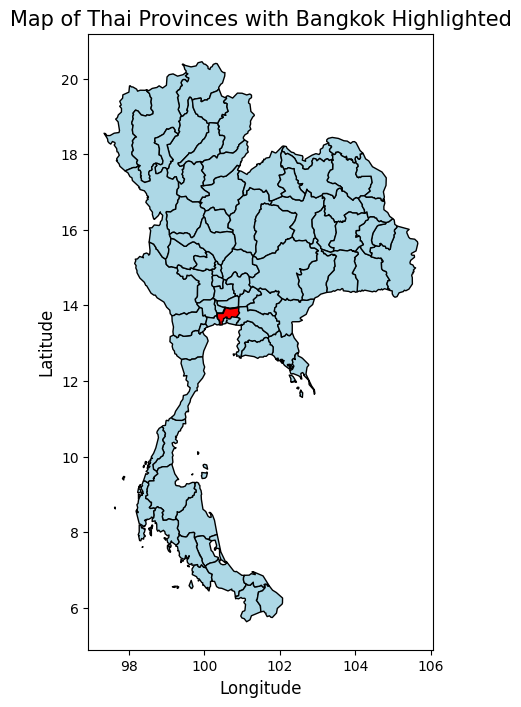

In [11]:
# Import necessary libraries
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the GeoJSON file
geojson_file = 'hook/data/thai_province_coordinates_geo.json'
gdf = gpd.read_file(geojson_file)

# Check for empty geometries and remove them
gdf = gdf[~gdf.is_empty]

# Ensure the CRS is set to WGS 84 (EPSG:4326)
if gdf.crs is None:
    gdf.set_crs(epsg=4326, inplace=True)

# Initialize a Matplotlib figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Plot all provinces in light blue
gdf.plot(ax=ax, color='lightblue', edgecolor='black')

# Highlight Bangkok in red, checking if it exists in the data
bangkok = gdf[gdf['name'] == 'Bangkok Metropolis']
if not bangkok.empty:
    bangkok.plot(ax=ax, color='red', edgecolor='black')

# Set the aspect of the plot to equal to ensure accurate representation
ax.set_aspect('equal')

# Add title and labels
ax.set_title('Map of Thai Provinces with Bangkok Highlighted', fontsize=15)
ax.set_xlabel('Longitude', fontsize=12)
ax.set_ylabel('Latitude', fontsize=12)

# Show the plot
plt.show()


In [7]:
import hook.tripadvisor_data as td 
location = td.TripadvisorApi(os.getenv('TRIPADVISOR_API_KEY'))
print(location.location_search('Bangkok').json())

{'data': [{'location_id': '293916', 'name': 'Bangkok', 'address_obj': {'street1': '', 'street2': '', 'country': 'Thailand', 'postalcode': '', 'address_string': 'Bangkok Thailand'}}, {'location_id': '20146210', 'name': 'Carlton Hotel Bangkok Sukhumvit', 'address_obj': {'street1': '491 Sukhumvit Road', 'street2': 'Khwaeng Klongtoey Nua, Khet Wattana', 'city': 'Bangkok', 'country': 'Thailand', 'postalcode': '10110', 'address_string': '491 Sukhumvit Road Khwaeng Klongtoey Nua, Khet Wattana, Bangkok 10110 Thailand'}}, {'location_id': '302770', 'name': 'The Sukhothai Bangkok', 'address_obj': {'street1': '13 / 3 South Sathorn Road', 'street2': 'Thungmahamek', 'city': 'Bangkok', 'country': 'Thailand', 'postalcode': '10120', 'address_string': '13 / 3 South Sathorn Road Thungmahamek, Bangkok 10120 Thailand'}}, {'location_id': '15239393', 'name': 'Rosewood Bangkok', 'address_obj': {'street1': '1041/38 Ploenchit Road', 'street2': 'Lumpini Pathumwan', 'city': 'Bangkok', 'country': 'Thailand', 'post

In [21]:
import hook.thai_tourism_data as tat
tourism_location = tat.ThaiTourismAPI()
search_params = {
        "keyword": "กาญจนบุรี",  # Example keyword for Kanchanaburi
        "location": "13.6904831,100.5226014",
        "categorycodes": "RESTAURANT",
        "province_name": "Bangkok",
        "radius": 20,
        "number_of_result": 10,
        "page_number": 1,
        "destination": "Bangkok",
        "filter_by_update_date": "2019/09/01-2021/12/31"
    }
tourism_data = tourism_location.fetch_search_location(**search_params)

df = pd.DataFrame([vars(place) for place in tourism_data])

df.head(5)
# for place in tourism_data:
#         print(f"Place Name: {place.place_name}, Province: {place.province}, Latitude: {place.latitude}, Longitude: {place.longitude}")

/Users/ittichaiboonyarakthunya/Library/Caches/pypoetry/virtualenvs/is-project-thailand-tourism-recommendation-qwL-LsgH-py3.12/lib/python3.12/site-packages/urllib3/connectionpool.py:1099: InsecureRequestWarning: Unverified HTTPS request is being made to host 'tatapi.tourismthailand.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


,place_id,place_name,latitude,longitude,category_code,category_description,sha_name,sha_type_code,sha_type_description,sha_cate_id,...,address,sub_district,district,province,postcode,thumbnail_url,destination,tags,distance,update_date
0,P01000013,ตลาดสดเทศบาลเมืองกาญจนบุรี,14.023496,99.529170,OTHER,สถานที่อื่นๆ,,,,,...,,บ้านเหนือ,เมืองกาญจนบุรี,กาญจนบุรี,71000,,กาญจนบุรี,None,0.0,2019-06-06T17:14:07
1,P03011787,ทรีท็อปแอดเวนเจอร์พาร์ค กาญจนบุรี,14.329694,98.979848,OTHER,สถานที่อื่นๆ,,,,,...,,ท่าเสา,ไทรโยค,กาญจนบุรี,71150,,กาญจนบุรี,None,0.0,2023-10-10T12:56:51.607
2,P03013770,โบราณสถานในเขตเมืองกาญจนบุรีเก่า,14.117252,99.401880,ATTRACTION,สถานที่ท่องเที่ยว,,,,,...,,ลาดหญ้า,เมืองกาญจนบุรี,กาญจนบุรี,71190,https://tatapi.tourismthailand.org/tatfs/Image...,กาญจนบุรี,None,0.0,2020-02-20T19:30:00
3,P03001243,ป้อมเมืองกาญจนบุรีเก่า,14.116284,99.401587,OTHER,สถานที่อื่นๆ,,,,,...,,ลาดหญ้า,เมืองกาญจนบุรี,กาญจนบุรี,71190,https://tatapi.tourismthailand.org/tatfs/image...,กาญจนบุรี,None,0.0,2020-01-07T15:21:40.79
4,P03011872,มหาวังช้างกาญจนบุรี,14.239987,99.015860,OTHER,สถานที่อื่นๆ,,,,,...,,วังกระแจะ,ไทรโยค,กาญจนบุรี,71150,,กาญจนบุรี,None,0.0,2023-10-10T13:49:27.183
